we use an image classification model in reality to classify different expressions of a person.

<ul>
<li><span style="color: #ffcc99;">Pandas -&gt; to load the data frame in a 2D array format&nbsp;</span></li>
<li><span style="color: #ffcc99;"> Numpy -&gt; can perform large computations in a very short time</span></li>
</ul>

<h2><span style="color: #00ff00;">Reading all images and storing them in a dataframe.</span></h2>

<p><span style="color: #ffff99;">Images contain images with the shape 48X48X1</span></p>

In [2]:
import math
import numpy as np
import pandas as pd

import scikitplot   #we should pip install scikit-plot to use that
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [3]:
# df = pd.read_csv('../input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
train_data=pd.read_csv('D:/CSV original/face expression recognition/train.csv')
val_data=pd.read_csv('D:/CSV original/face expression recognition/val.csv')
# train_data.head()
# print(df.shape) # (35887, 3)
print(train_data.shape) # (35887, 3)

train_data.head()

(28709, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
print(type(train_data['pixels'][0]))
lst=train_data['pixels'][0].split()
print(lst)
lst=[int(s) for s in lst]
print(lst)
lst=np.array(lst).reshape(48,48,1)
print(lst)
# lst=[[s] for s in lst]
# print(lst)
# lst=np.array(lst)
# print(lst)
# print('---------------')
# lst=lst.reshape((48,48,1))
# print(lst)
# print('***********************')
# print(lst[:][:][0])
# print(len(lst[:][:][0]))
# train_data['pixels'][0]


<class 'str'>
['70', '80', '82', '72', '58', '58', '60', '63', '54', '58', '60', '48', '89', '115', '121', '119', '115', '110', '98', '91', '84', '84', '90', '99', '110', '126', '143', '153', '158', '171', '169', '172', '169', '165', '129', '110', '113', '107', '95', '79', '66', '62', '56', '57', '61', '52', '43', '41', '65', '61', '58', '57', '56', '69', '75', '70', '65', '56', '54', '105', '146', '154', '151', '151', '155', '155', '150', '147', '147', '148', '152', '158', '164', '172', '177', '182', '186', '189', '188', '190', '188', '180', '167', '116', '95', '103', '97', '77', '72', '62', '55', '58', '54', '56', '52', '44', '50', '43', '54', '64', '63', '71', '68', '64', '52', '66', '119', '156', '161', '164', '163', '164', '167', '168', '170', '174', '175', '176', '178', '179', '183', '187', '190', '195', '197', '198', '197', '198', '195', '191', '190', '145', '86', '100', '90', '65', '57', '60', '54', '51', '41', '49', '56', '47', '38', '44', '63', '55', '46', '52', '54', '55', '

<p><span style="color: #ffff99;">This data is not in image format but it&rsquo;s in a format called data-frame. The&nbsp;<code class="cw pi pj pk pl b">pixels</code>&nbsp;column of the data-frame contains all the pixel values.&nbsp;<strong class="lw fp">each image is grey-scaled and of resolution 48x48</strong></span></p>

<p><span style="color: #ffcc99;">Now, we will check the number of emotion categories we have and the number of images in each of those categories.</span></p>

<h1><span style="color: #ff0000;">pandas.unique</span></h1>
<ul>
<li><span style="color: #ffff99;">Return unique values based on a hash table.</span></li>
<li><span style="color: #ffff99;">Uniques are returned in order of appearance. This does NOT sort.</span></li>
<li><span style="color: #ffff99;">Returns:numpy.ndarray or ExtensionArray</span></li>
</ul>
<p>&nbsp;</p>

In [5]:
train_data.emotion.unique() # array([0, 2, 4, 6, 3, 5, 1])


array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [6]:
train_data.emotion.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

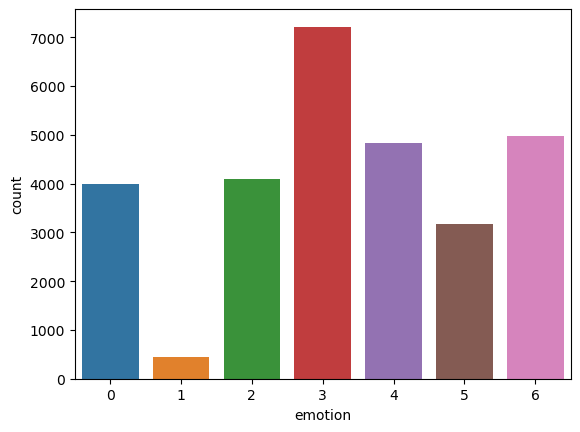

In [7]:
%matplotlib inline
# sns.countplot(train_data.emotion)
sns.countplot(x= train_data['emotion']) #the previous line code was wrong
pyplot.show()

In [8]:
emotion_label_to_text = {
  0: 'anger',
  1: 'disgust',
  2: 'fear',
  3: 'happiness',
  4: 'sadness',
  5: 'surprise',
  6: 'neutral'
}

<p id="2bab" class="lu lv oo lw b lx ly lz ma mb mc md me ms mg mh mi mt mk ml mm mu mo mp mq mr fh bj" data-selectable-paragraph=""><span style="color: #cc99ff;">So, there are 7 categories of emotions in this data-set and emotion&nbsp;<strong class="lw fp">disgust</strong>&nbsp;has the minimum images around 5&ndash;10% of other classes.</span></p>
<p id="9fd0" class="pw-post-body-paragraph lu lv fo lw b lx ly lz ma mb mc md me mf mg mh mi mj mk ml mm mn mo mp mq mr fh bj" data-selectable-paragraph=""><span style="color: #cc99ff;">Let&rsquo;s visualize the images of each emotion category.</span></p>
<p>&nbsp;</p>

<h1><span style="color: #ff0000;">matplotlib.pyplot.figure</span></h1>
<dl class="py function">
<dt id="matplotlib.pyplot.figure" class="sig sig-object py"><span style="color: #cc99ff;"><span class="sig-prename descclassname"><span class="pre">matplotlib.pyplot.</span></span><span class="sig-name descname"><span class="pre">figure</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">num=None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">figsize=None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">dpi=None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">*</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">facecolor=None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">edgecolor=None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">frameon=True</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">FigureClass=&lt;class</span>&nbsp;<span class="pre">'matplotlib.figure.Figure'&gt;</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">clear=False</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">**kwargs</span></span></em><span class="sig-paren">)</span></span></dt>
<dt><span style="color: #99cc00;"><strong>num:</strong><span class="classifier">int or str or&nbsp;<a class="reference internal" style="color: #99cc00;" title="matplotlib.figure.Figure" href="https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure"><code class="xref py py-obj docutils literal notranslate"><span class="pre">Figure</span></code></a>&nbsp;or&nbsp;<a class="reference internal" style="color: #99cc00;" title="matplotlib.figure.SubFigure" href="https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.SubFigure"><code class="xref py py-obj docutils literal notranslate"><span class="pre">SubFigure</span></code></a>, optional</span></span></dt>
<dd>
<p><span style="color: #99cc00;">A unique identifier for the figure.</span></p>
<p><span style="color: #99cc00;">If a figure with that identifier already exists, this figure is made active and returned. An integer refers to the&nbsp;<code class="docutils literal notranslate"><span class="pre">Figure.number</span></code>&nbsp;attribute, a string refers to the figure label.</span></p>
<p><span style="color: #99cc00;">If there is no figure with the identifier or&nbsp;<em>num</em>&nbsp;is not given, a new figure is created, made active and returned.</span> <span style="color: #cc99ff;">If&nbsp;<em>num</em>&nbsp;is an int, it will be used for the&nbsp;<code class="docutils literal notranslate"><span class="pre">Figure.number</span></code>&nbsp;attribute</span><span style="color: #99cc00;">, otherwise, an auto-generated integer value is used (starting at 1 and incremented for each new figure). If&nbsp;<em>num</em>&nbsp;is a string, the figure label and the window title is set to this value. If num is a&nbsp;<code class="docutils literal notranslate"><span class="pre">SubFigure</span></code>, its parent&nbsp;<code class="docutils literal notranslate"><span class="pre">Figure</span></code>&nbsp;is activated.</span></p>
<p>&nbsp;</p>
</dd>
<dt><span style="color: #99cc00;"><strong>figsize:</strong><span class="classifier">(float, float), default:&nbsp;<code class="docutils literal notranslate"><a class="reference internal" style="color: #99cc00;" href="https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=figure.figsize#matplotlibrc-sample"><span class="std std-ref"><span class="pre">rcParams["figure.figsize"]</span></span></a></code>&nbsp;(default:&nbsp;<code class="docutils literal notranslate"><span class="pre">[6.4,</span>&nbsp;<span class="pre">4.8]</span></code>)</span></span></dt>
<dd>
<p><span style="color: #99cc00;">Width, height in inches.</span></p>
</dd>
</dl>

In [9]:
a=sorted(train_data.emotion.unique())
print(type(a))
a

<class 'list'>


[0, 1, 2, 3, 4, 5, 6]

<h3><span style="color: #ff9900;"><em>dataframe</em>.iloc[<em>row, column</em>]</span></h3>
<table class="ws-table-all notranslate" style="margin-left: auto; margin-right: auto;">
<tbody>
<tr>
<td><span style="color: #ffff00;"><em>row</em></span></td>
<td><span style="color: #ffff00;">Optional. A number, or numbers specifying the index of the row(s)</span></td>
</tr>
<tr>
<td><span style="color: #ffff00;"><em>column</em></span></td>
<td><span style="color: #ffff00;">Optional. A number, or numbers, specifying the index of the column(s)</span></td>
</tr>
</tbody>
</table>
<h2><span style="color: #ff9900;">Return Value</span></h2>
<p><span style="color: #ffff00;">Depends on the input:</span></p>
<p><span style="color: #ffff00;">Single indexes for both row and column&nbsp;<code class="w3-codespan">[1, 0]</code>&nbsp;returns the content of that cell.</span></p>
<p><span style="color: #ffff00;">Single index for one row&nbsp;<code class="w3-codespan">[1]</code>&nbsp;returns a&nbsp;<a style="color: #ffff00;" href="https://www.w3schools.com/python/pandas/pandas_series.asp">Pandas Series</a>.</span></p>
<p><span style="color: #ffff00;">A list of indexes&nbsp;<code class="w3-codespan">[[0, 2]]</code>&nbsp;returns a&nbsp;<a style="color: #ffff00;" href="https://www.w3schools.com/python/pandas/pandas_dataframes.asp">Pandas DataFrame</a>.</span></p>

In [10]:
data = [[50, True], [40, False], [30, False]]

df = pd.DataFrame(data)
print(df)
print('-----------------')
print(df.iloc[1, 0])

    0      1
0  50   True
1  40  False
2  30  False
-----------------
40


In [11]:
df.iloc[[0, 2]] #a dataframe consisting of first and third rows

,0,1
0,50,True
2,30,False


In [12]:
df.iloc[[0, 1], [0, 1]] #[0, 1]:rows  ,  [0, 1]:columns

,0,1
0,50,True
1,40,False


In [13]:
type(df.iloc[1])    #when refering to one row it is series

pandas.core.series.Series

In [14]:
df.iloc[0:2]    #rows

,0,1
0,50,True
1,40,False


In [15]:
train_data[train_data.emotion==2]

,emotion,pixels,Usage
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training
17,2,255 255 255 255 255 255 255 255 255 255 255 25...,Training
21,2,174 51 37 37 38 41 22 25 22 24 35 51 70 83 98 ...,Training
...,...,...,...
28682,2,10 10 10 10 10 10 10 10 10 10 12 2 45 117 122 ...,Training
28690,2,186 182 173 164 164 177 91 45 66 72 79 79 85 1...,Training
28695,2,84 96 110 132 165 183 175 154 116 95 75 67 63 ...,Training
28701,2,34 42 47 34 53 41 33 39 42 38 40 44 41 42 42 4...,Training


In [16]:
print(type(train_data[train_data.emotion==2].pixels.iloc[1]))
ptest=train_data[train_data.emotion==2].pixels.iloc[1]
ptest

<class 'str'>


'55 55 55 55 55 54 60 68 54 85 151 163 170 179 181 185 188 188 191 196 189 194 198 197 195 194 190 193 195 184 175 172 161 159 158 159 147 136 137 136 146 120 86 93 114 116 99 74 55 55 55 55 55 52 71 86 79 143 156 165 166 171 176 179 184 192 194 195 190 193 199 196 195 195 190 189 188 176 166 164 163 159 156 147 145 138 136 129 142 141 106 101 122 126 115 90 55 55 55 55 55 58 67 86 135 164 166 164 164 168 169 172 180 191 190 192 193 193 196 191 191 187 183 181 180 177 168 165 162 150 144 139 141 138 132 128 126 144 136 109 101 128 136 114 55 55 55 56 54 65 61 107 152 155 157 165 170 171 171 171 170 179 182 186 186 184 183 181 184 188 188 186 178 175 170 167 156 146 139 137 139 135 129 127 122 134 137 109 112 130 145 139 55 55 55 57 66 84 90 137 147 147 152 165 162 166 170 170 166 177 182 185 187 187 187 193 198 193 185 180 177 174 170 161 160 156 153 147 130 127 134 118 118 126 132 123 116 128 155 132 55 56 62 61 65 89 137 145 147 154 156 161 157 165 170 174 180 180 177 181 184 182 180

In [17]:
ptest=ptest.split(' ')
print(type(ptest),'\n',ptest)
print('----------------------')
ptest=train_data[train_data.emotion==2].pixels.iloc[1]
print(np.array(ptest.split(' ')).reshape(48, 48).astype('float32'))

<class 'list'> 
 ['55', '55', '55', '55', '55', '54', '60', '68', '54', '85', '151', '163', '170', '179', '181', '185', '188', '188', '191', '196', '189', '194', '198', '197', '195', '194', '190', '193', '195', '184', '175', '172', '161', '159', '158', '159', '147', '136', '137', '136', '146', '120', '86', '93', '114', '116', '99', '74', '55', '55', '55', '55', '55', '52', '71', '86', '79', '143', '156', '165', '166', '171', '176', '179', '184', '192', '194', '195', '190', '193', '199', '196', '195', '195', '190', '189', '188', '176', '166', '164', '163', '159', '156', '147', '145', '138', '136', '129', '142', '141', '106', '101', '122', '126', '115', '90', '55', '55', '55', '55', '55', '58', '67', '86', '135', '164', '166', '164', '164', '168', '169', '172', '180', '191', '190', '192', '193', '193', '196', '191', '191', '187', '183', '181', '180', '177', '168', '165', '162', '150', '144', '139', '141', '138', '132', '128', '126', '144', '136', '109', '101', '128', '136', '114', '55', 

<p><span style="color: #ffff99;"><strong>pyplot.tight_layout() is a function in Matplotlib that automatically adjusts the positions of the subplots and their margins in a figure to fit the contents of the plots. It helps to prevent overlapping of the subplots and makes the figure more visually appealing.this function Adjusts the padding between and around subplots.</strong></span></p>

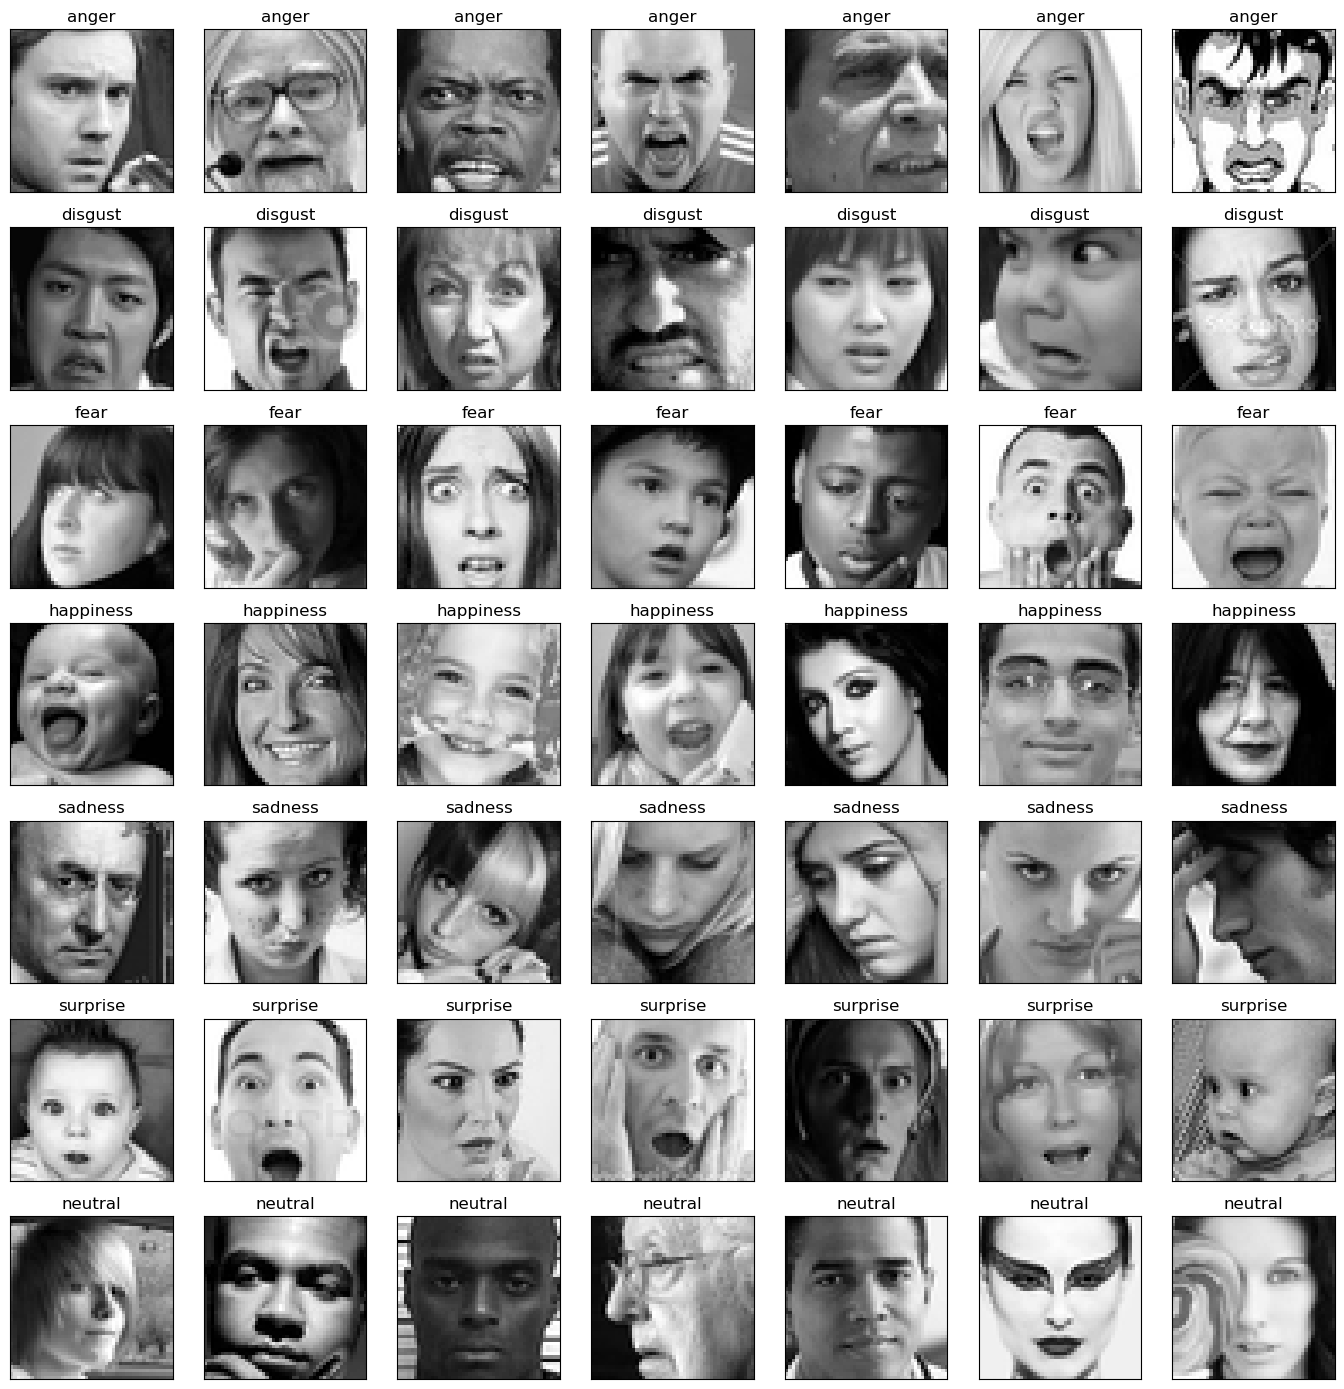

In [18]:
fig = pyplot.figure(1, (14, 14))    #1 is figure.number attribute,(14,14) 14 inches by 14 inches

k = 0
for label in sorted(train_data.emotion.unique()):
    for j in range(7):
        px = train_data[train_data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])   #removes all the x-axis tick marks from the plot
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

<p><span style="color: #ffff99;">For simplicity we will train our upcoming model on top three classes only i.e., 3:Happy, 4:Sad and 6:Neutral.</span></p>

<h1><span style="color: #ffff99;">pandas.DataFrame.isin</span></h1>
<p><span style="color: #ffff99;">Whether each element in the DataFrame is contained in value</span></p>

In [19]:
INTERESTED_LABELS = [3, 4, 6]

train_data.emotion.isin(INTERESTED_LABELS)

0        False
1        False
2        False
3         True
4         True
         ...  
28704    False
28705    False
28706     True
28707    False
28708     True
Name: emotion, Length: 28709, dtype: bool

In [20]:
INTERESTED_LABELS = [3, 4, 6]

train_data = train_data[train_data.emotion.isin(INTERESTED_LABELS)]
train_data.shape # (21264, 3)

(17010, 3)

<h2><span style="color: #ff0000;">Creating our own custom FER Model </span></h2>
<p><span style="color: #3366ff;">We will create an Convolutional Neural Network(CNN) for this task and then we will feed batches of 48x48x1 gray-scaled images. But the current data we have is not in that format, so we need to make the data compatible for our model otherwise it will crash even before it starts learning. Below is the code which will make the data compatible with our upcoming model</span></p>

In [21]:
print(type(train_data.pixels.iloc[0]))
train_data.pixels.iloc[0]

<class 'str'>


'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

<div>
<div><span style="color: #ff99cc;">pixels in train data are still in str format so to make them appliable to net they should be changed in type</span></div>
</div>

<p><span style="color: #ffff99;">in the following snippet converted each flattened image into a square 3 dimensional image of size 48x48x1(note, as this is a grey-scaled image so there is only a single channel).</span></p>

In [22]:
#converted each flattened image into a square 3 dimensional image of size 48x48x1(note, as this is a grey-scaled image so there is only a single channel)
img_array = train_data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array


3        [[[24.0], [32.0], [36.0], [30.0], [32.0], [23....
4        [[[4.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...
6        [[[20.0], [17.0], [19.0], [21.0], [25.0], [38....
7        [[[77.0], [78.0], [79.0], [79.0], [78.0], [75....
8        [[[85.0], [84.0], [90.0], [121.0], [101.0], [1...
                               ...                        
28698    [[[35.0], [45.0], [69.0], [79.0], [75.0], [48....
28699    [[[128.0], [134.0], [164.0], [94.0], [70.0], [...
28700    [[[11.0], [10.0], [12.0], [13.0], [9.0], [11.0...
28706    [[[74.0], [81.0], [87.0], [89.0], [95.0], [100...
28708    [[[195.0], [199.0], [205.0], [206.0], [205.0],...
Name: pixels, Length: 17010, dtype: object

In [23]:
a = [1, 7, 2]

myvar = pd.Series(a)

print(myvar)
print(myvar[1])

0    1
1    7
2    2
dtype: int64
7


In [24]:
print(type(img_array))
# print(type(img_array[1]))

<class 'pandas.core.series.Series'>


<p><span style="color: #ffff99;">stacking all those images along the 4th dimension because we feed data as batches to our model rather than feeding one image at a time. This is because we will be using&nbsp;<strong class="lw fp">mini-batch gradient descent</strong>&nbsp;as our optimizer</span></p>

In [25]:
img_array = np.stack(img_array, axis=0) #Joins a sequence of arrays along a new axis
img_array.shape # (21264, 48, 48, 1)


(17010, 48, 48, 1)

<h1><span style="color: #ff0000;"><a class="reference internal" style="color: #ff0000;" title="sklearn.preprocessing" href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing"><code class="xref py py-mod docutils literal notranslate"><span class="pre">sklearn.preprocessing</span></code></a>.LabelEncoder</span></h1>
<p><span style="color: #99ccff;">The LabelEncoder() is a class in the scikit-learn library of Python that is used for encoding categorical variables into numerical labels. It is commonly used in machine learning tasks where the input data contains categorical variables that cannot be directly used by the algorithms. The LabelEncoder() assigns a unique integer label to each category in the variable, starting from 0. For example, if you have a categorical variable called 'color' with categories 'red', 'green', and 'blue', the LabelEncoder() would assign the labels 0, 1, and 2 to these categories respectively</span></p>

<p><span style="color: #ffff99;">Now our images(X) are ready but we also need to make our labels compatible with our model. here we're label encoding our categories</span></p>

In [26]:

le = LabelEncoder()
img_labels = le.fit_transform(train_data.emotion)
img_labels  #just 3 labels


array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
i_l = np_utils.to_categorical([1,1,2,1,3])
print(i_l.shape)
i_l


(5, 4)


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

<p>&nbsp;</p>
<p><span style="color: #ffff99;">np_utils.to_categorical is a function in the Keras library of Python that is used for converting numerical labels into one-hot encoded vectors</span></p>

In [28]:
img_labels = np_utils.to_categorical(img_labels)
print(img_labels.shape) # (21264, 3)
img_labels


(17010, 3)


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [29]:
# INTERESTED_LABELS = [3, 4, 6]
le.classes_

array([3, 4, 6], dtype=int64)

In [30]:
tr=le.transform(le.classes_)
tr

array([0, 1, 2], dtype=int64)

<p><span style="color: #00ff00;"><code class="cw pi pj pk pl b">le_name_mapping</code>&nbsp;, is the mapping from original class label to new label. Like, the emotion&nbsp;<em class="oo">Happy</em>&nbsp;which was originally 3 is now labelled 0</span></p>

In [32]:

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping # {3: 0, 4: 1, 6: 2}

{3: 0, 4: 1, 6: 2}

<p><span style="color: #99ccff;">In train_test_split function from sklearn library in Python, stratify is an optional parameter that is used for stratified sampling of the data. Stratified sampling is a sampling technique where the population is divided into homogeneous subgroups called strata, and the sample is selected from each stratum in proportion to its size. </span></p>

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(
  img_array,
  img_labels,
  shuffle=True, 
  stratify=img_labels,
  test_size=0.1, 
  random_state=42
)

del df  #deletes df and frees up the memory allocated to it
del img_array
del img_labels

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(15309, 48, 48, 1) (1701, 48, 48, 1) (15309, 3) (1701, 3)


<p id="80ad" class="pw-post-body-paragraph lu lv fo lw b lx ly lz ma mb mc md me mf mg mh mi mj mk ml mm mn mo mp mq mr fh bj" data-selectable-paragraph=""><span style="color: #ffcc00;">Now, we will normalize the image arrays, this is done because <strong>neural networks are highly sensitive to non-normalized data</strong>. We will use&nbsp;<strong class="lw fp">min-max normalization.</strong></span></p>
<p id="ecc8" class="pw-post-body-paragraph lu lv fo lw b lx ly lz ma mb mc md me mf mg mh mi mj mk ml mm mn mo mp mq mr fh bj" data-selectable-paragraph=""><span style="color: #ffcc00;">For these gray-scaled images min=0, max=255 therefore we will divide the array by&nbsp;<strong class="lw fp">255&nbsp;</strong>because</span></p>

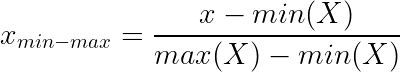

In [34]:
# Normalizing arrays, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

<ul>
<li><span style="color: #ffff99;">For generalization purpose&nbsp;<strong class="lw fp"><em class="oo">dropouts</em></strong>&nbsp;are used at regular intervals.</span></li>
<li><span style="color: #ffff99;"><strong class="lw fp"><em class="oo">ELU</em></strong>&nbsp;is used as the activation function because firstly it avoids&nbsp;<em class="oo">dying relu problem</em>&nbsp;but it also performed well as compared to LeakyRelu, at-least in this case.</span></li>
<li><span style="color: #ffff99;"><strong class="lw fp">he_normal</strong>&nbsp;is used as kernel initializer as it suits ELU.</span></li>
<li><span style="color: #ffff99;"><strong class="lw fp">Batch Normalization</strong>&nbsp;is also used for better results.</span></li>
<li style="list-style-type: none;"></li>
</ul>

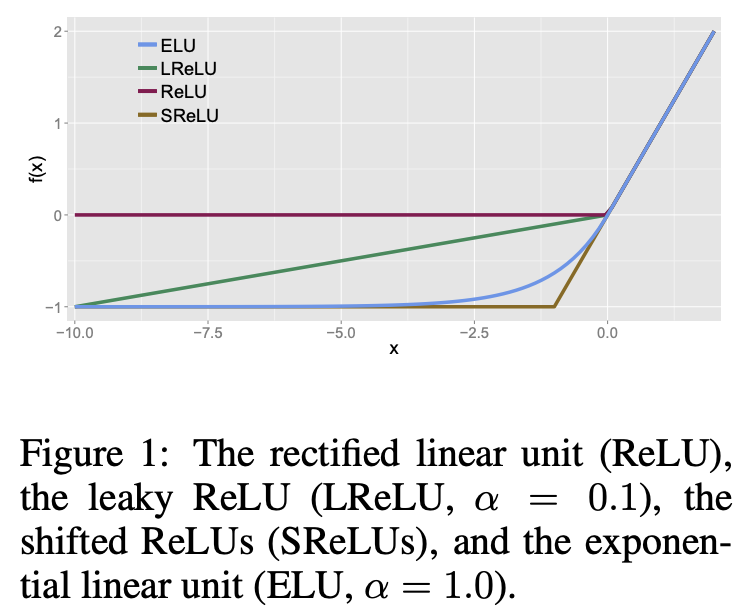

<p id="80ad" class="pw-post-body-paragraph lu lv fo lw b lx ly lz ma mb mc md me mf mg mh mi mj mk ml mm mn mo mp mq mr fh bj" data-selectable-paragraph=""><span style="color: #ffcc00;">The Exponential Linear Unit (ELU) is&nbsp;<strong>an activation function for neural networks</strong>. In contrast to ReLUs, ELUs have negative values which allows them to push mean unit activations closer to zero like batch normalization but with lower computational complexity.</span></p>

<ul>
<li>
<p><span style="color: #99ccff;">The <span style="color: #ffff99;">he_normal</span> kernel initializer is a method used in deep learning to initialize the weights of neural network layers. It is named after its creator, Kaiming He.</span></p>
<p><span style="color: #99ccff;">The he_normal initializer initializes the weights of a layer with a random normal distribution with a mean of 0 and a standard deviation of sqrt(2/n), where n is the number of input units in the weight tensor. This initialization helps to prevent vanishing or exploding gradients during training, which can lead to poor performance or convergence issues.</span></p>
<p><span style="color: #99ccff;">The he_normal initializer is often used in convolutional neural networks (CNNs) and other deep learning models that use rectified linear unit (ReLU) activation functions</span></p>
</li>
</ul>

<ul>
<li>
<p><span style="color: #00ff00;">Padding='same' is a parameter used in convolutional neural networks (CNNs) to specify the type of padding to be applied to the input image or feature map before performing convolution.</span></p>
<p><span style="color: #00ff00;">When padding='same', the output feature map has the same spatial dimensions as the input, which means that the input is padded with zeros along the edges if necessary to ensure that the output size is preserved. This is particularly useful when the filter size is larger than 1x1, as it allows the filter to be applied to the edges of the input without losing information.</span></p>
<p><span style="color: #00ff00;">Padding='same' can also help prevent information loss at the edges of the input image or feature map, which can be important for tasks such as object detection or segmentation. However, it may also increase the computational cost of the CNN, as more computations are required to process the padded input.</span></p>
</li>
<li style="list-style-type: none;"></li>
</ul>

<p><span style="color: #ff6600;">tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs )</span></p>
<ul>
<li><span style="color: #ff6600;"><strong>strides</strong>: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to&nbsp;<code>pool_size</code>.</span></li>
</ul>

<p><span style="color: #ffcc99;">Dropout Rate The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8</span></p>

In [33]:
def build_net(optim):
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,    #num_classes=3
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

<p><span style="color: #ffff99;">heer we 've used two callbacks one is early stopping for avoiding over-fitting the training data and other ReduceLROnPlateau for reducing learning rate whenever the validation accuracy plateaus</span></p>

<h1 id="earlystopping"><span style="color: #ff0000;">EarlyStopping</span></h1>
<p><span style="color: #ccffff;">tf.keras.callbacks.EarlyStopping( monitor="val_loss", min_delta=0, patience=0, verbose=0, mode="auto", baseline=None, restore_best_weights=False, start_from_epoch=0, )</span></p>
<p><span style="color: #ccffff;">Stop training when a monitored metric has stopped improving</span></p>

<h1><span style="color: #ff0000;">ReduceLROnPlateau</span></h1>
<pre><span style="color: #ccffff;"><code><span class="n">tf</span><span class="o">.</span><span class="n">keras</span><span class="o">.</span><span class="n">callbacks</span><span class="o">.</span><span class="n">ReduceLROnPlateau</span><span class="p">(</span>
    <span class="n">monitor</span><span class="o">=</span><span class="s2">"val_loss"</span><span class="p">,</span>
    <span class="n">factor</span><span class="o">=</span><span class="mf">0.1</span><span class="p">,</span>
    <span class="n">patience</span><span class="o">=</span><span class="mi">10</span><span class="p">,</span>
    <span class="n">verbose</span><span class="o">=</span><span class="mi">0</span><span class="p">,</span>
    <span class="n">mode</span><span class="o">=</span><span class="s2">"auto"</span><span class="p">,</span>
    <span class="n">min_delta</span><span class="o">=</span><span class="mf">0.0001</span><span class="p">,</span>
    <span class="n">cooldown</span><span class="o">=</span><span class="mi">0</span><span class="p">,</span>
    <span class="n">min_lr</span><span class="o">=</span><span class="mi">0</span><span class="p">,</span>
    <span class="o">**</span><span class="n">kwargs</span>
<span class="p">)</span></code></span></pre>
<p><span style="color: #ff99cc;">Reduce learning rate when a metric has stopped improving.</span></p>
<p><span style="color: #ff99cc;">Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced</span></p>
<ul>
<li><span style="color: #ff99cc;"><strong>monitor</strong>: quantity to be monitored.</span></li>
<li><span style="color: #ff99cc;"><strong>factor</strong>: factor by which the learning rate will be reduced.&nbsp;<code>new_lr = lr * factor</code>.</span></li>
<li><span style="color: #ff99cc;"><strong>patience</strong>: number of epochs with no improvement after which learning rate will be reduced.</span></li>
<li><span style="color: #ff99cc;"><strong>verbose</strong>: int. 0: quiet, 1: update messages.</span></li>
<li><span style="color: #ff99cc;"><strong>min_lr</strong>: lower bound on the learning rate.</span></li>
</ul>

In [34]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

<p><span style="color: #ff0000;">ImageDataGenerator</span><span style="color: #cc99ff;"> is also used as this helps in model performance because we add some changes to the images which we may encounter a lot in real world like shearing, rotations etc,Generate batches of tensor image data with real-time data augmentation. Also, this generator loops over the data indefinitely, so it produces an infinite number of batches</span></p>

<p><span style="color: #ffff99;"><span style="color: #3366ff;"><strong>rotation_range</strong>&nbsp;</span>: integer.&nbsp;Rotation range to randomly rotate the image</span></p>
<p><span style="color: #ffff99;">ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument</span></p>
<p><span style="color: #ffff99;"><span style="color: #3366ff;"><strong>width_shift_range</strong>&nbsp;</span>: Floating point number (ratio to width).&nbsp;Random horizontal shift range,The width_shift_range is&nbsp;a floating point number between 0.0 and 1.0 which specifies the upper bound of the fraction of the total width by which the image is to be randomly shifted, either towards the left or right</span></p>
<p><span style="color: #ffff99;"><span style="color: #3366ff;"><strong>shear_range</strong>&nbsp;</span>: floating point number.&nbsp;Shear intensity (counterclockwise shear angle)</span></p>
<p><span style="color: #ffff99;"><span style="color: #3366ff;"><strong>zoom_range</strong></span>&nbsp;: float or [lower, upper].&nbsp;Random zoom range.&nbsp;If given a floating point number&nbsp;<code>[lower, upper] = [1-zoom_range, 1+zoom_range]</code></span></p>
<p><span style="color: #3366ff;"><strong>horizontal_flip</strong></span><span style="color: #3366ff;">&nbsp;</span><span style="color: #ffff99;">: truth value.&nbsp;Randomly flips the input horizontally.</span></p>
<p><span style="color: #ffff99;"><code></code></span></p>

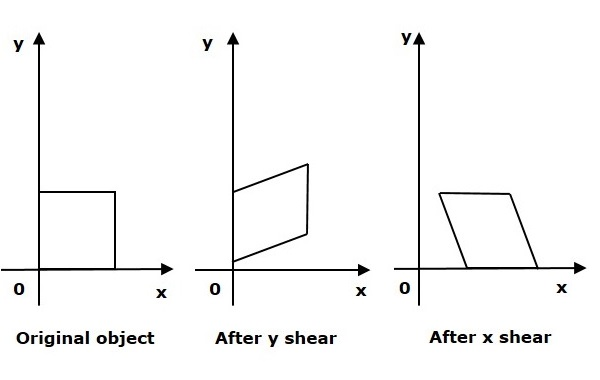

<div>
<h2><span style="color: #ffcc00;">train_datagen.fit:</span></h2>
</div>
<p><span style="color: #808080;">some imagedatagenerator transformations require statistics of the entire dataset. These transformations include featurewise_center, featurewise_std_normalization and zca_whitening.</span></p>
<p><span style="color: #808080;">To calculate these statistics, first of all, one may need to load the entire dataset into the memory. Then calculate the mean, standard deviation, principal components or any other statistics from that data. Fortunately, Keras has a built-in fit method for doing this</span></p>
<p><span style="color: #ffff99;"><code></code></span></p>

In [35]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

train_datagen.fit(X_train)

<div>
<p><span style="color: #ffff99;">both&nbsp;<strong class="lw fp">Nadam</strong>&nbsp;and&nbsp;<strong class="lw fp">Adam&nbsp;</strong>optimizers are&nbsp;tried but achieved similar performance. Batch size of 32 is used, and trained for a max 100 epochs.</span></p>
</div>
<p><span style="color: #ffff99;"><code></code></span></p>

In [36]:
batch_size = 32 #batch size of 32 performs the best.

epochs = 20

optims = [
  optimizers.Nadam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
      epsilon=1e-07,
      name='Nadam'),
    
  optimizers.Adam(0.001),   #This is a statement in Python that creates an instance of the Adam optimizer with a learning rate of 0.001
]

<h3><span style="color: #00ff00;">Let&rsquo;s now train the model and log the training performance</span></h3>

<h2><span style="color: #ff0000;">keras.fit() and keras.fit_generator()</span></h2>
<p><span style="color: #ffff99;"><strong>keras.fit() and keras.fit_generator()</strong>&nbsp;in Python are two separate deep learning libraries which can be used to train our machine learning and deep learning models. Both these functions can do the same task, but when to use which function is the main question.</span></p>
<p><span style="color: #ccffff;"><strong>Keras.fit()</strong></span></p>
<div id="GFG_AD_gfg_mobile_336x280">&nbsp;</div>
<p><span style="color: #cc99ff;"><strong>Syntax:</strong></span></p>
<pre><span style="color: #cc99ff;">fit(object, x = NULL, y = NULL, batch_size = NULL, epochs = 10,
  verbose = getOption("keras.fit_verbose", default = 1),
  callbacks = NULL, view_metrics = getOption("keras.view_metrics",
  default = "auto"), validation_split = 0, validation_data = NULL,
  shuffle = TRUE, class_weight = NULL, sample_weight = NULL,
  initial_epoch = 0, steps_per_epoch = NULL, validation_steps = NULL,
  ...)</span><br /><br /><span style="color: #ffff99;"><strong>Understanding few important arguments:</strong></span></pre>
<pre><span style="color: #ffff99;">-&gt; <strong>object</strong> : the model to train.      
-&gt; <strong>X</strong> : our training data. Can be Vector, array or matrix      
-&gt; <strong>Y</strong> : our training labels. Can be Vector, array or matrix       
-&gt; <strong>Batch_size</strong> : it can take any integer value or NULL and by default, it will
be set to 32. It specifies no. of samples per gradient.      
-&gt; <strong>Epochs</strong> : an integer and number of epochs we want to train our model for.      
-&gt; <strong>Verbose</strong> : specifies verbosity mode(0 = silent, 1= progress bar, 2 = one
line per epoch).      
-&gt; <strong>Shuffle</strong> : whether we want to shuffle our training data before each epoch.      
-&gt; <strong>steps_per_epoch</strong> : it specifies the total number of steps taken before
one epoch has finished and started the next epoch. By default it values is set to NULL</span>.<br /><br /></pre>
<p><span style="color: #ff00ff;"><strong>How to use Keras fit:</strong></span></p>
<pre><span style="color: #ff00ff;">model.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100)</span></pre>
<p><span style="color: #ff00ff;">Here we are first feeding the training data(Xtrain) and training labels(Ytrain). We then use Keras to allow our model to train for 100 epochs on a batch_size of 32.</span></p>
<p><span style="color: #ff00ff;">When we call the&nbsp;<strong>.fit()</strong>&nbsp;function it makes assumptions:</span></p>
<div id="GFG_AD_Desktop_InContent_ATF_336x280">&nbsp;</div>
<ul>
<li><span style="color: #ffff99;">The entire training set can fit into the Random Access Memory (RAM) of the computer.</span></li>
<li><span style="color: #ffff99;">Calling the model. fit method for a second time is not going to reinitialize our already trained weights, which means we can actually make consecutive calls to fit if we want to and then manage it properly.</span></li>
<li><span style="color: #ffff99;">There is no need for using the Keras generators(i.e no data argumentation)</span></li>
<li><span style="color: #ffff99;">Raw data is itself used for training our network and our raw data will only fit into the memory.</span></li>
</ul>
<p><span style="color: #cc99ff;"><strong>The Keras.fit_generator():</strong></span></p>
<p><span style="color: #cc99ff;"><strong>Syntax:</strong></span></p>
<pre><span style="color: #cc99ff;">fit_generator(object, generator, steps_per_epoch, epochs = 1,
  verbose = getOption("keras.fit_verbose", default = 1),
  callbacks = NULL, view_metrics = getOption("keras.view_metrics",
  default = "auto"), validation_data = NULL, validation_steps = NULL,
  class_weight = NULL, max_queue_size = 10, workers = 1,
  initial_epoch = 0)</span></pre>
<p><span style="color: #ffff99;"><strong>Understanding few important arguments:</strong></span></p>
<pre><span style="color: #ffff99;">      
-&gt; <strong>object</strong> : the Keras Object model.
-&gt; <strong>generator</strong> : a generator whose output must be a list of the form:
                      - (inputs, targets)    
                      - (input, targets, sample_weights)
a single output of the generator makes a single batch and hence all arrays in the list 
must be having the length equal to the size of the batch. The generator is expected 
to loop over its data infinite no. of times, it should never return or exit.
-&gt; <strong>steps_per_epoch</strong> : it specifies the total number of steps taken from the generator
 as soon as one epoch is finished and next epoch has started. We can calculate the value
of steps_per_epoch as the total number of samples in your dataset divided by the batch size.
-&gt; <strong>Epochs</strong> : an integer and number of epochs we want to train our model for.
-&gt; <strong>Verbose</strong> : specifies verbosity mode(0 = silent, 1= progress bar, 2 = one line per epoch).
-&gt; <strong>callbacks</strong> : a list of callback functions applied during the training of our model.
-&gt; <strong>validation_data</strong> can be either:
                      - an inputs and targets list
                      - a generator
                      - an inputs, targets, and sample_weights list which can be used to evaluate
                        the loss and metrics for any model after any epoch has ended.
-&gt; <strong>validation_steps</strong> :only if the validation_data is a generator then only this argument
can be used. It specifies the total number of steps taken from the generator before it is 
stopped at every epoch and its value is calculated as the total number of validation data points
in your dataset divided by the validation batch size.
</span></pre>
<p><span style="color: #ff9900;"><strong>How to use Keras fit_generator:</strong></span></p>
<pre><span style="color: #ff9900;"># performing data argumentation by training image generator
dataAugmentaion = ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.1, height_shift_range = 0.1)

# training the model
model.fit_generator(dataAugmentaion.flow(trainX, trainY, batch_size = 32),
 validation_data = (testX, testY), steps_per_epoch = len(trainX) // 32,
 epochs = 10)
</span></pre>
<p><span style="color: #999999;">Here we are training our network for 10 epochs along with the default batch size of 32.</span></p>
<p><span style="color: #999999;">For small and less complex datasets it is recommended to use keras.fit function whereas while dealing with real-world datasets it is not that simple because real-world datasets are huge in size and are much harder to fit into the computer memory.</span><br /><span style="color: #999999;">It is more challenging to deal with those datasets and an important step to deal with those datasets is to perform data augmentation to avoid the overfitting of a model and also to increase the ability of our model to generalize.</span></p>
<p><span style="color: #999999;"><strong>Data Augmentation</strong>&nbsp;is a method of artificially creating a new dataset for training from the existing training dataset to improve the performance of deep learning neural networks with the amount of data available. It is a form of regularization which makes our model generalize better than before.</span><br /><span style="color: #999999;">Here we have used a Keras&nbsp;<strong>ImageDataGenerator</strong>&nbsp;object to apply data augmentation for randomly translating, resizing, rotating, etc the images. Each new batch of our data is randomly adjusting according to the parameters supplied to&nbsp;<strong>ImageDataGenerator</strong>.</span></p>
<p><span style="color: #999999;"><strong>When we call the&nbsp;.fit_generator()&nbsp;function it makes assumptions:</strong></span></p>
<ul>
<li><span style="color: #999999;">Keras is first calling the generator function(dataAugmentaion)</span></li>
<li><span style="color: #999999;">Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.</span></li>
<li><span style="color: #999999;">our&nbsp;<strong>.fit_generator()</strong>&nbsp;function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.</span></li>
<li><span style="color: #999999;">For the number of epochs specified(10 in our case) the process is repeated.</span></li>
</ul>
<p><span style="color: #999999;"><strong>Summary :</strong></span><br /><span style="color: #999999;">So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network</span><br /><span style="color: #999999;"><strong>.fit</strong>&nbsp;is used when the entire training dataset can fit into the memory and no data augmentation is applied.</span><br /><span style="color: #999999;"><strong>.fit_generator</strong>&nbsp;is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.</span></p>

<p><span style="color: #ff9900;"><strong class="schema-faq-question">What is the difference between ImageDataGenerator flow and flow from directory?</strong></span></p>
<p class="schema-faq-answer"><span style="color: #ccffff;">A. The&nbsp;<code>flow</code>&nbsp;method in&nbsp;<code>ImageDataGenerator</code>&nbsp;takes input data and their corresponding labels directly from memory. On the other hand, the&nbsp;<code>flow_from_directory</code>&nbsp;method reads the input data and labels from a directory structure. The latter is useful when dealing with large datasets where images are organized in folders representing their respective classes, making it easier to load and process the data in batches</span>.</p>

In [37]:
model = build_net(optims[1]) 

history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks
    # use_multiprocessing=True  #when using this option it raised an error then I commentet it out
)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_4136\2552230902.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
478/478 [==============================] - 769s 2s/step - loss: 1.3858 - accuracy: 0.3842 - val_loss: 1.0218 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 2/20
478/478 [==============================] - 782s 2s/step - loss: 1.0516 - accuracy: 0.4646 - val_loss: 1.0491 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 3/20
478/478 [==============================] - 783s 2s/step - loss: 0.9667 - accuracy: 0.5261 - val_loss: 0.8894 - val_accuracy: 0.5791 - lr: 0.0010
Epoch 4/20
478/478 [==============================] - 785s 2s/step - loss: 0.8893 - accuracy: 0.5695 - val_loss: 0.8249 - val_accuracy: 0.6355 - lr: 0.0010
Epoch 5/20
478/478 [==============================] - 785s 2s/step - loss: 0.8175 - accuracy: 0.6119 - val_loss: 0.8370 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 6/20
478/478 [==============================] - 813s 2s/step - loss: 0.7678 - accuracy: 0.6440 - val_loss: 0.6597 - val_accuracy: 0.6814 - lr: 0.0010
Epoch 7/20
478/478 [==============================] - 811s 2s/st

<p><span style="color: #ffff99;"><span class="sig-prename descclassname"><span class="pre">seaborn.</span></span><span class="sig-name descname"><span class="pre">set</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="o"><span class="pre">*</span></span><span class="n"><span class="pre">args</span></span></em>,&nbsp;<em class="sig-param"><span class="o"><span class="pre">**</span></span><span class="n"><span class="pre">kwargs</span></span></em><span class="sig-paren">)</span></span></p>
<p><span style="color: #ffff99;">Alias for&nbsp;<a class="reference internal" style="color: #ffff99;" title="seaborn.set_theme" href="https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme"><code class="xref py py-func docutils literal notranslate"><span class="pre">set_theme()</span></code></a>, which is the preferred interface.</span></p>
<p><span style="color: #ffff99;">This function may be removed in the future. this function will load seaborn's default theme and color palette to the session.</span></p>
<p>&nbsp;</p>

In [38]:
history

In [39]:
history.history #is a dict 

{'loss': [1.3857660293579102,
  1.0516114234924316,
  0.9666696190834045,
  0.8892879486083984,
  0.8174960017204285,
  0.7677952647209167,
  0.7322611808776855,
  0.7031939029693604,
  0.6796272993087769,
  0.6580140590667725,
  0.6475653052330017,
  0.6329187154769897,
  0.6253169775009155,
  0.6095495820045471,
  0.6037871837615967,
  0.594443678855896,
  0.5847330689430237,
  0.5745299458503723,
  0.5689634084701538,
  0.5706089735031128],
 'accuracy': [0.3841530978679657,
  0.4645633399486542,
  0.5260957479476929,
  0.5694689154624939,
  0.6119276285171509,
  0.644000232219696,
  0.6696714162826538,
  0.6882225871086121,
  0.6998497843742371,
  0.7119994759559631,
  0.7160493731498718,
  0.7253903150558472,
  0.730681300163269,
  0.7339473366737366,
  0.7408713698387146,
  0.7401528358459473,
  0.7491018176078796,
  0.75589519739151,
  0.757136344909668,
  0.7577895522117615],
 'val_loss': [1.021807074546814,
  1.0491000413894653,
  0.8894281387329102,
  0.8248942494392395,
  0.8

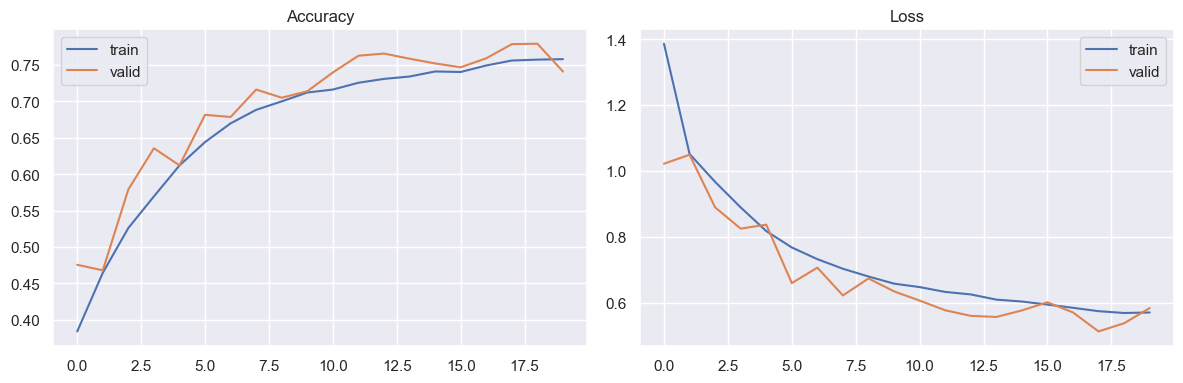

In [48]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
# sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

<p><span style="color: #ffcc99;">at the end the model started over-fitting training data and here the model automatically stopped because we have enabled early-stopping. Also, ReduceLROnPlateau is called whenever the accuracy plateaus.</span></p>

<p><span style="color: #cc99ff;">We should also save this model using save function and use this for latter use.</span></p>

<h3><span style="color: #ff0000;">model.to_json()</span></h3>
<p><span style="color: #ffff99;">Saving/loading only a model's architecture If you only need to save the architecture of a model, and not its weights or its training configuration, you can do: </span></p>
<p><span style="color: #ffff99;"># save as JSON</span></p>
<p><span style="color: #ffff99;">json_string = model.to_json()</span></p>

<p><span style="color: #ffcc99;">You can save the whole model (including architecture, weights, and even optimizer state) into a single HDF5 file using&nbsp;<span style="color: #99ccff;"><code>model.save('something.h5')</code></span>, and then load it using</span></p>
<pre class="lang-py s-code-block"><span style="color: #99ccff;"><code class="hljs language-python">model = keras.models.load_model(<span class="hljs-string">'something.h5'</span>)
</code></span></pre>
<p><span style="color: #ffcc99;">This has been standard for many years in Keras. There is no need to use JSON files to store the architecture.</span></p>

In [50]:
    
model.save("model.h5")

<h1><span style="color: #ffcc00;">seaborn.violinplot</span></h1>
<p><span style="color: #ccffcc;">Draw a combination of boxplot and kernel density estimate.</span></p>
<p><span style="color: #ccffcc;"><strong>data:</strong><span class="classifier">DataFrame, array, or list of arrays, optional</span></span></p>
<p><span style="color: #ccffcc;">Dataset for plotting. If&nbsp;<code class="docutils literal notranslate"><span class="pre">x</span></code>&nbsp;and&nbsp;<code class="docutils literal notranslate"><span class="pre">y</span></code>&nbsp;are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.</span></p>
<p><span style="color: #ccffcc;"><strong>x, y, hue:</strong><span class="classifier">names of variables in&nbsp;<code class="docutils literal notranslate"><span class="pre">data</span></code>&nbsp;or vector data, optional</span></span></p>
<p><span style="color: #ccffcc;">Inputs for plotting long-form data.</span></p>
<p><span style="color: #ccffcc;"><strong>showfliers:</strong><span class="classifier">bool, optional</span></span></p>
<p><span style="color: #ccffcc;">If False, suppress the plotting of outliers</span></p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<p><span style="color: #00ff00;">melt()</span>&nbsp;<span style="color: #ccffff;">function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value</span></p>
<p>&nbsp;</p>

In [52]:
history.history['accuracy']

[0.3841530978679657,
 0.4645633399486542,
 0.5260957479476929,
 0.5694689154624939,
 0.6119276285171509,
 0.644000232219696,
 0.6696714162826538,
 0.6882225871086121,
 0.6998497843742371,
 0.7119994759559631,
 0.7160493731498718,
 0.7253903150558472,
 0.730681300163269,
 0.7339473366737366,
 0.7408713698387146,
 0.7401528358459473,
 0.7491018176078796,
 0.75589519739151,
 0.757136344909668,
 0.7577895522117615]

In [54]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})    #history.history['accuracy'] is a list
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})


In [55]:
df_accu

,train,valid
0,0.384153,0.475603
1,0.464563,0.467960
2,0.526096,0.579071
3,0.569469,0.635509
4,0.611928,0.611993
5,0.644000,0.681364
6,0.669671,0.678424
7,0.688223,0.716049
8,0.699850,0.704879
9,0.711999,0.713698


In [56]:
data=pd.melt(df_accu)
data

,variable,value
0,train,0.384153
1,train,0.464563
2,train,0.526096
3,train,0.569469
4,train,0.611928
5,train,0.644000
6,train,0.669671
7,train,0.688223
8,train,0.699850
9,train,0.711999


<p><span style="color: #ffff99;">A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.</span></p>
<p><span style="color: #ffff99;">This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.</span></p>

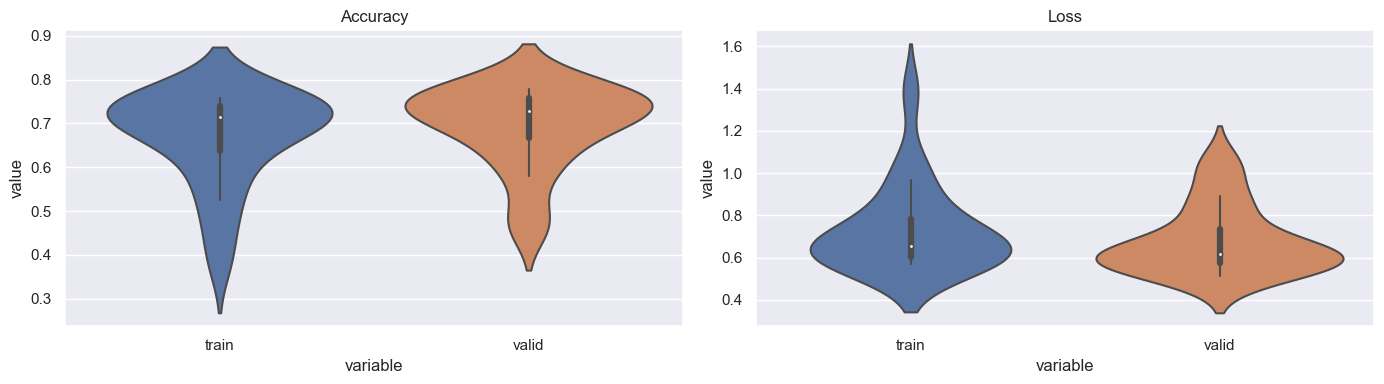

In [57]:

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)    #notice the value and variable columns in pd.melt
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

<p><span style="color: #ccffcc;">We will now visualize what we called a&nbsp;<strong class="lw fp">confusion-matrix</strong>, it is one of the most widely used evaluator for multi-class classification. It gives us a good glance of model&rsquo;s performance on all classes.</span></p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [60]:
y_valid

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [59]:
# yhat_valid = model.predict_classes(X_valid) #This function was removed in TensorFlow version 2.6
yhat_valid = model.predict(X_valid) 
yhat_valid

54/54 [==============================] - 19s 350ms/step


array([[0.00444366, 0.21425992, 0.78129643],
       [0.00470718, 0.38414785, 0.611145  ],
       [0.11130709, 0.07107772, 0.8176152 ],
       ...,
       [0.0219287 , 0.16061197, 0.8174594 ],
       [0.01226659, 0.1312357 , 0.8564977 ],
       [0.00904579, 0.12299926, 0.86795497]], dtype=float32)

In [61]:
yhat_valid=np.argmax(yhat_valid,axis=1)
yhat_valid

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

total wrong validation predictions: 441


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       721
           1       0.87      0.37      0.52       483
           2       0.56      0.92      0.70       497

    accuracy                           0.74      1701
   macro avg       0.78      0.72      0.70      1701
weighted avg       0.80      0.74      0.73      1701



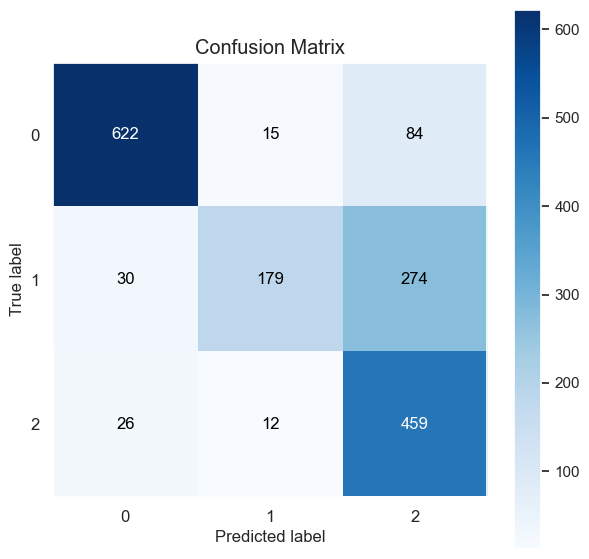

In [62]:

scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

<p><span style="color: #ffff99;">The confusion matrix clearly shows that our model is doing good job on the class happy but it's performance is low on other two classes. One of the reason for this could be the fact that these two classes have less data. But when I looked at the images I found some images from these two classes are even hard for a human to tell whether the person is sad or neutral. Facial expression depends on individual as well. Some person's neutral face looks more like sad.</span></p>

<h2><span style="color: #ff0000;">numpy.where</span></h2>
<p><span style="color: #ccffcc;"><span class="sig-prename descclassname"><span class="pre">numpy.</span></span><span class="sig-name descname"><span class="pre">where</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">condition</span></span></em>,&nbsp;<span class="optional">[</span><em class="sig-param"><span class="n"><span class="pre">x</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">y</span></span></em>,&nbsp;<span class="optional">]</span><em class="sig-param"><span class="n"><span class="pre">/</span></span></em><span class="sig-paren">)</span></span></p>
<p><span class="sig-paren" style="color: #ccffcc;"><strong>condition:</strong><span class="classifier">array_like, bool</span></span></p>
<p><span style="color: #ccffcc;">Where True, yield&nbsp;<em class="xref py py-obj">x</em>, otherwise yield&nbsp;<em class="xref py py-obj">y</em>.</span></p>
<p><span style="color: #ccffcc;"><strong>x, y:</strong><span class="classifier">array_like</span></span></p>
<p><span style="color: #ccffcc;">Values from which to choose.&nbsp;<em class="xref py py-obj">x</em>,&nbsp;<em class="xref py py-obj">y</em>&nbsp;and&nbsp;<em class="xref py py-obj">condition</em>&nbsp;need to be broadcastable to some shape.</span></p>
<p><span style="color: #ccffcc;"><strong>returnes:</strong><span class="classifier">ndarray</span></span></p>
<p><span style="color: #ccffcc;">An array with elements from&nbsp;<em class="xref py py-obj">x</em>&nbsp;where&nbsp;<em class="xref py py-obj">condition</em>&nbsp;is True, and elements from&nbsp;<em class="xref py py-obj">y</em>&nbsp;elsewhere.</span></p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [36]:
print(type(np.where(y_valid[:, 1]==1)))
print(np.where(y_valid[:, 1]==1))   #returnes a tuple
# print(np.where(y_valid[:, 1]==1).shape())
print(np.where(y_valid[:, 1]==1)[0])    #[0] to access the array
print(np.where(y_valid[:, 1]==1)[0][2])


<class 'tuple'>
(array([   1,    2,    8,   14,   16,   19,   21,   24,   27,   39,   41,
         42,   43,   45,   62,   65,   70,   71,   79,   84,   86,   91,
         98,  101,  114,  115,  121,  122,  127,  128,  134,  139,  147,
        148,  154,  155,  157,  159,  161,  163,  170,  171,  173,  181,
        183,  185,  192,  193,  194,  196,  200,  212,  218,  221,  223,
        226,  233,  235,  237,  250,  251,  253,  254,  256,  266,  267,
        271,  272,  281,  286,  288,  290,  293,  297,  299,  305,  306,
        307,  312,  314,  324,  329,  334,  336,  338,  344,  347,  351,
        352,  357,  369,  378,  379,  382,  384,  392,  408,  411,  421,
        422,  425,  428,  429,  431,  434,  440,  442,  451,  463,  467,
        471,  474,  475,  477,  481,  483,  484,  485,  487,  489,  497,
        498,  499,  503,  505,  510,  512,  520,  522,  524,  526,  529,
        538,  546,  549,  550,  552,  553,  558,  562,  565,  568,  571,
        574,  579,  585,  588,  59

<h2><span style="color: #ff99cc;">numpy.random.choice</span></h2>
<p><span style="color: #99ccff;"><span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">choice</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">a</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">size</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">replace</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">True</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">p</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em><span class="sig-paren">)</span></span></p>
<p><span class="sig-paren" style="color: #99ccff;"><strong>a:</strong><span class="classifier">1-D array-like or int</span></span></p>
<p><span style="color: #99ccff;">If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if it were&nbsp;<code class="docutils literal notranslate"><span class="pre">np.arange(a)</span></code></span></p>
<p><span style="color: #99ccff;"><strong>size:</strong><span class="classifier">int or tuple of ints, optional</span></span></p>
<p><span style="color: #99ccff;">Output shape. If the given shape is, e.g.,&nbsp;<code class="docutils literal notranslate"><span class="pre">(m,</span>&nbsp;<span class="pre">n,</span>&nbsp;<span class="pre">k)</span></code>, then&nbsp;<code class="docutils literal notranslate"><span class="pre">m</span>&nbsp;<span class="pre">*</span>&nbsp;<span class="pre">n</span>&nbsp;<span class="pre">*</span>&nbsp;<span class="pre">k</span></code>&nbsp;samples are drawn. Default is None, in which case a single value is returned.</span></p>
<p>&nbsp;</p>

In [39]:
# random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1), size=9)    #raises an error without [0]
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_sad_imgs

array([ 717, 1467, 1372,  800,  155,  921, 1406,  485,  571], dtype=int64)

In [40]:
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)
print(type(enumerate(zip(random_sad_imgs, random_neutral_imgs))))
enumerate(zip(random_sad_imgs, random_neutral_imgs))

<class 'enumerate'>


1/1 [==============================] - 0s 34ms/step


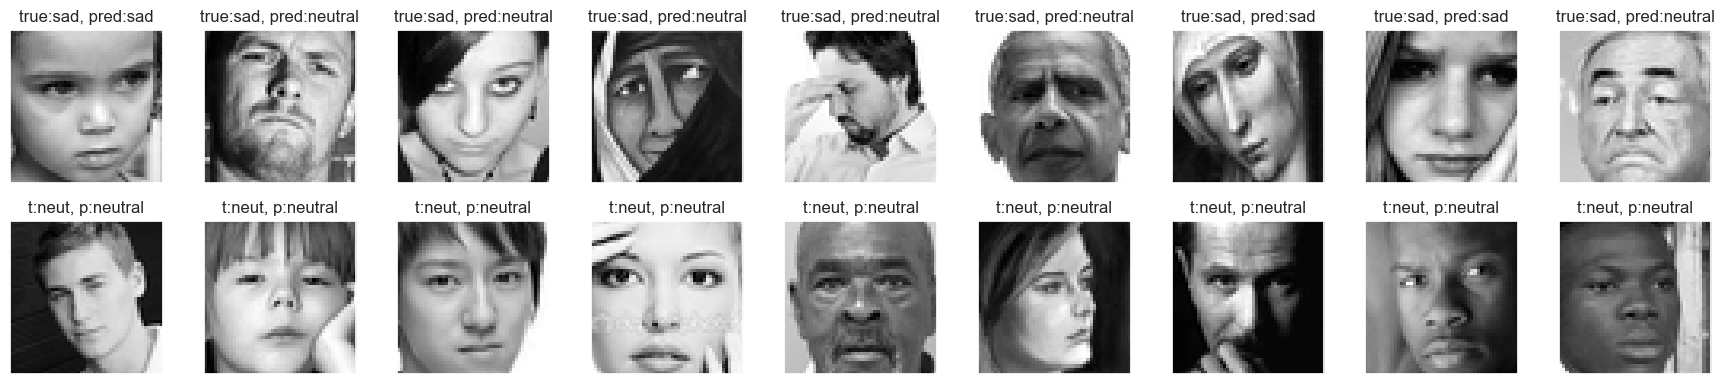

In [65]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]  #img_array.shape # (21264, 48, 48, 1),X_valid is samples from img_array
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img_predict=model.predict(sample_img.reshape(1,48,48,1))
        sample_img_predict=np.argmax(sample_img_predict,axis=1)
        ax.set_title(f"true:sad, pred:{mapper[sample_img_predict[0]]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img_predict=model.predict(sample_img.reshape(1,48,48,1))
        sample_img_predict=np.argmax(sample_img_predict,axis=1)
        ax.set_title(f"t:neut, p:{mapper[sample_img_predict[0]]}")

        pyplot.tight_layout()

<p><span style="color: #ffff99;"><strong class="lw fp">some of the errors made by our model is due to the errors in the data itself.</strong></span></p>